### If you doubt, run the code!

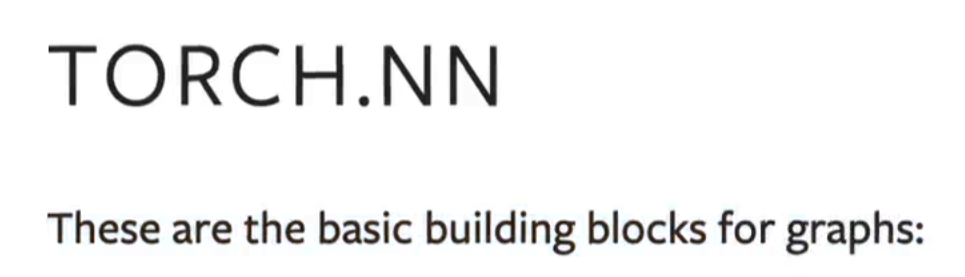

In [1]:
import torch
import torch.nn as nn 

torch.__version__

'2.9.0+cu128'

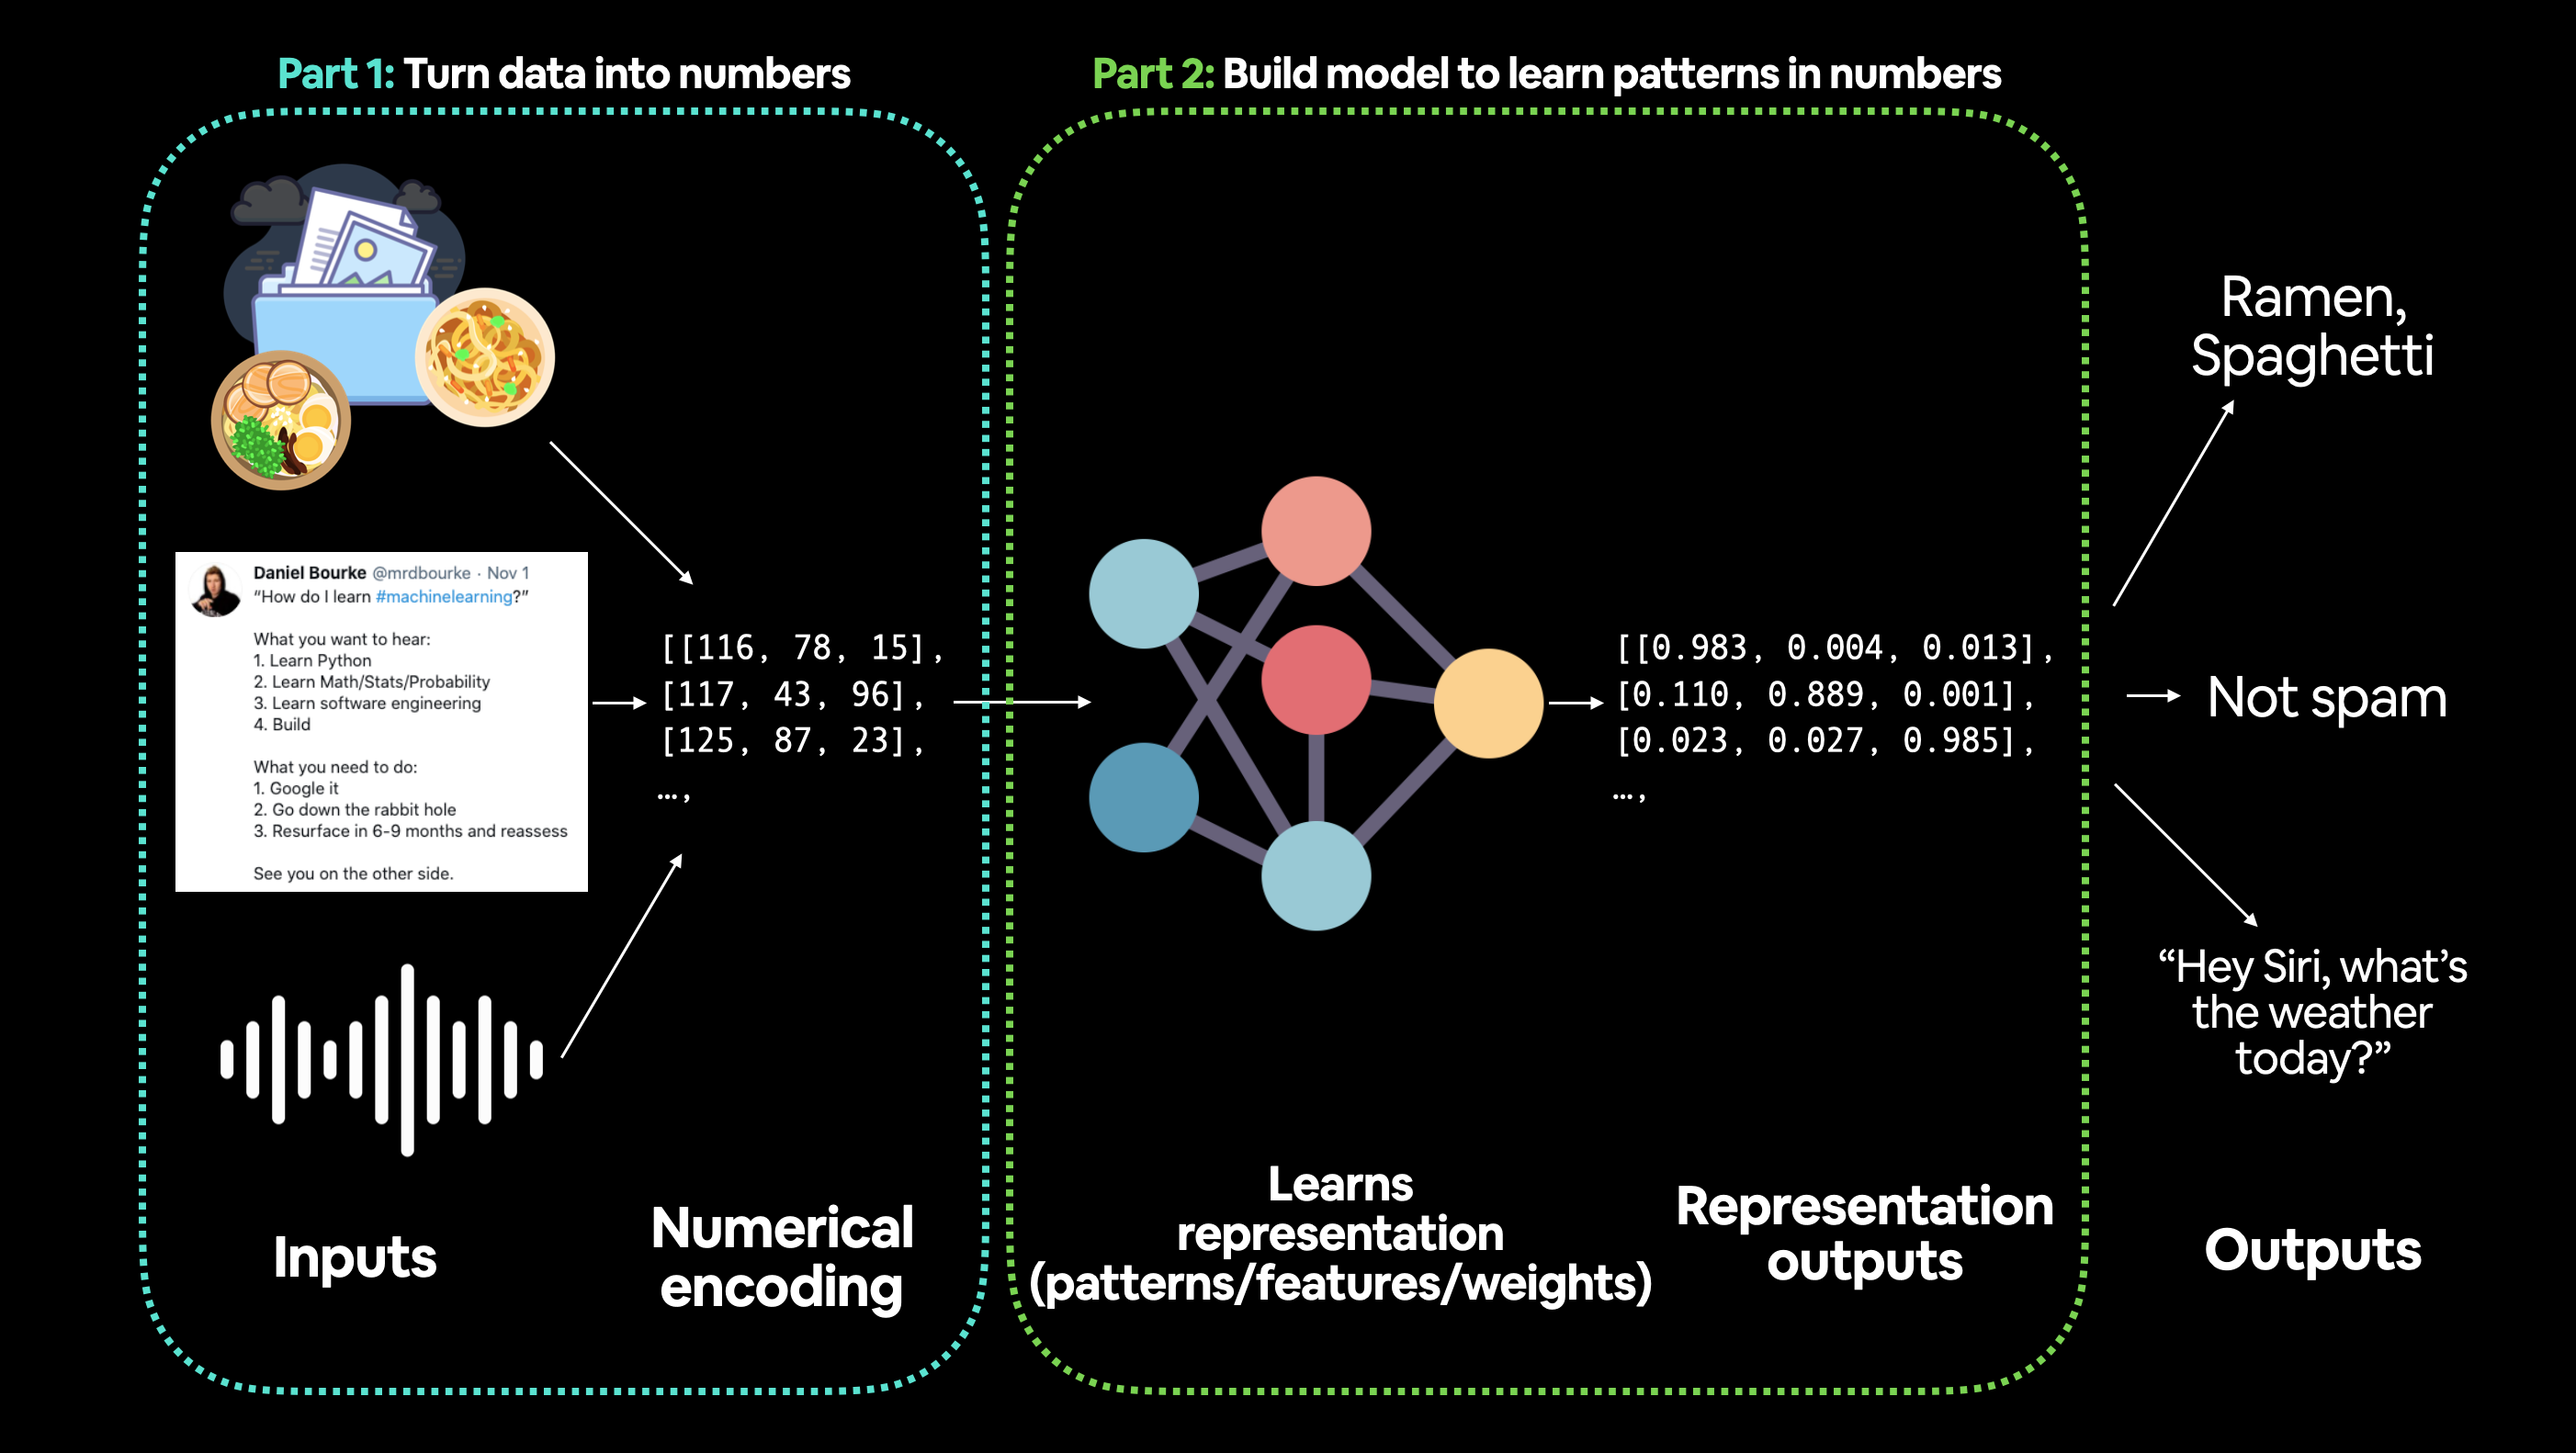

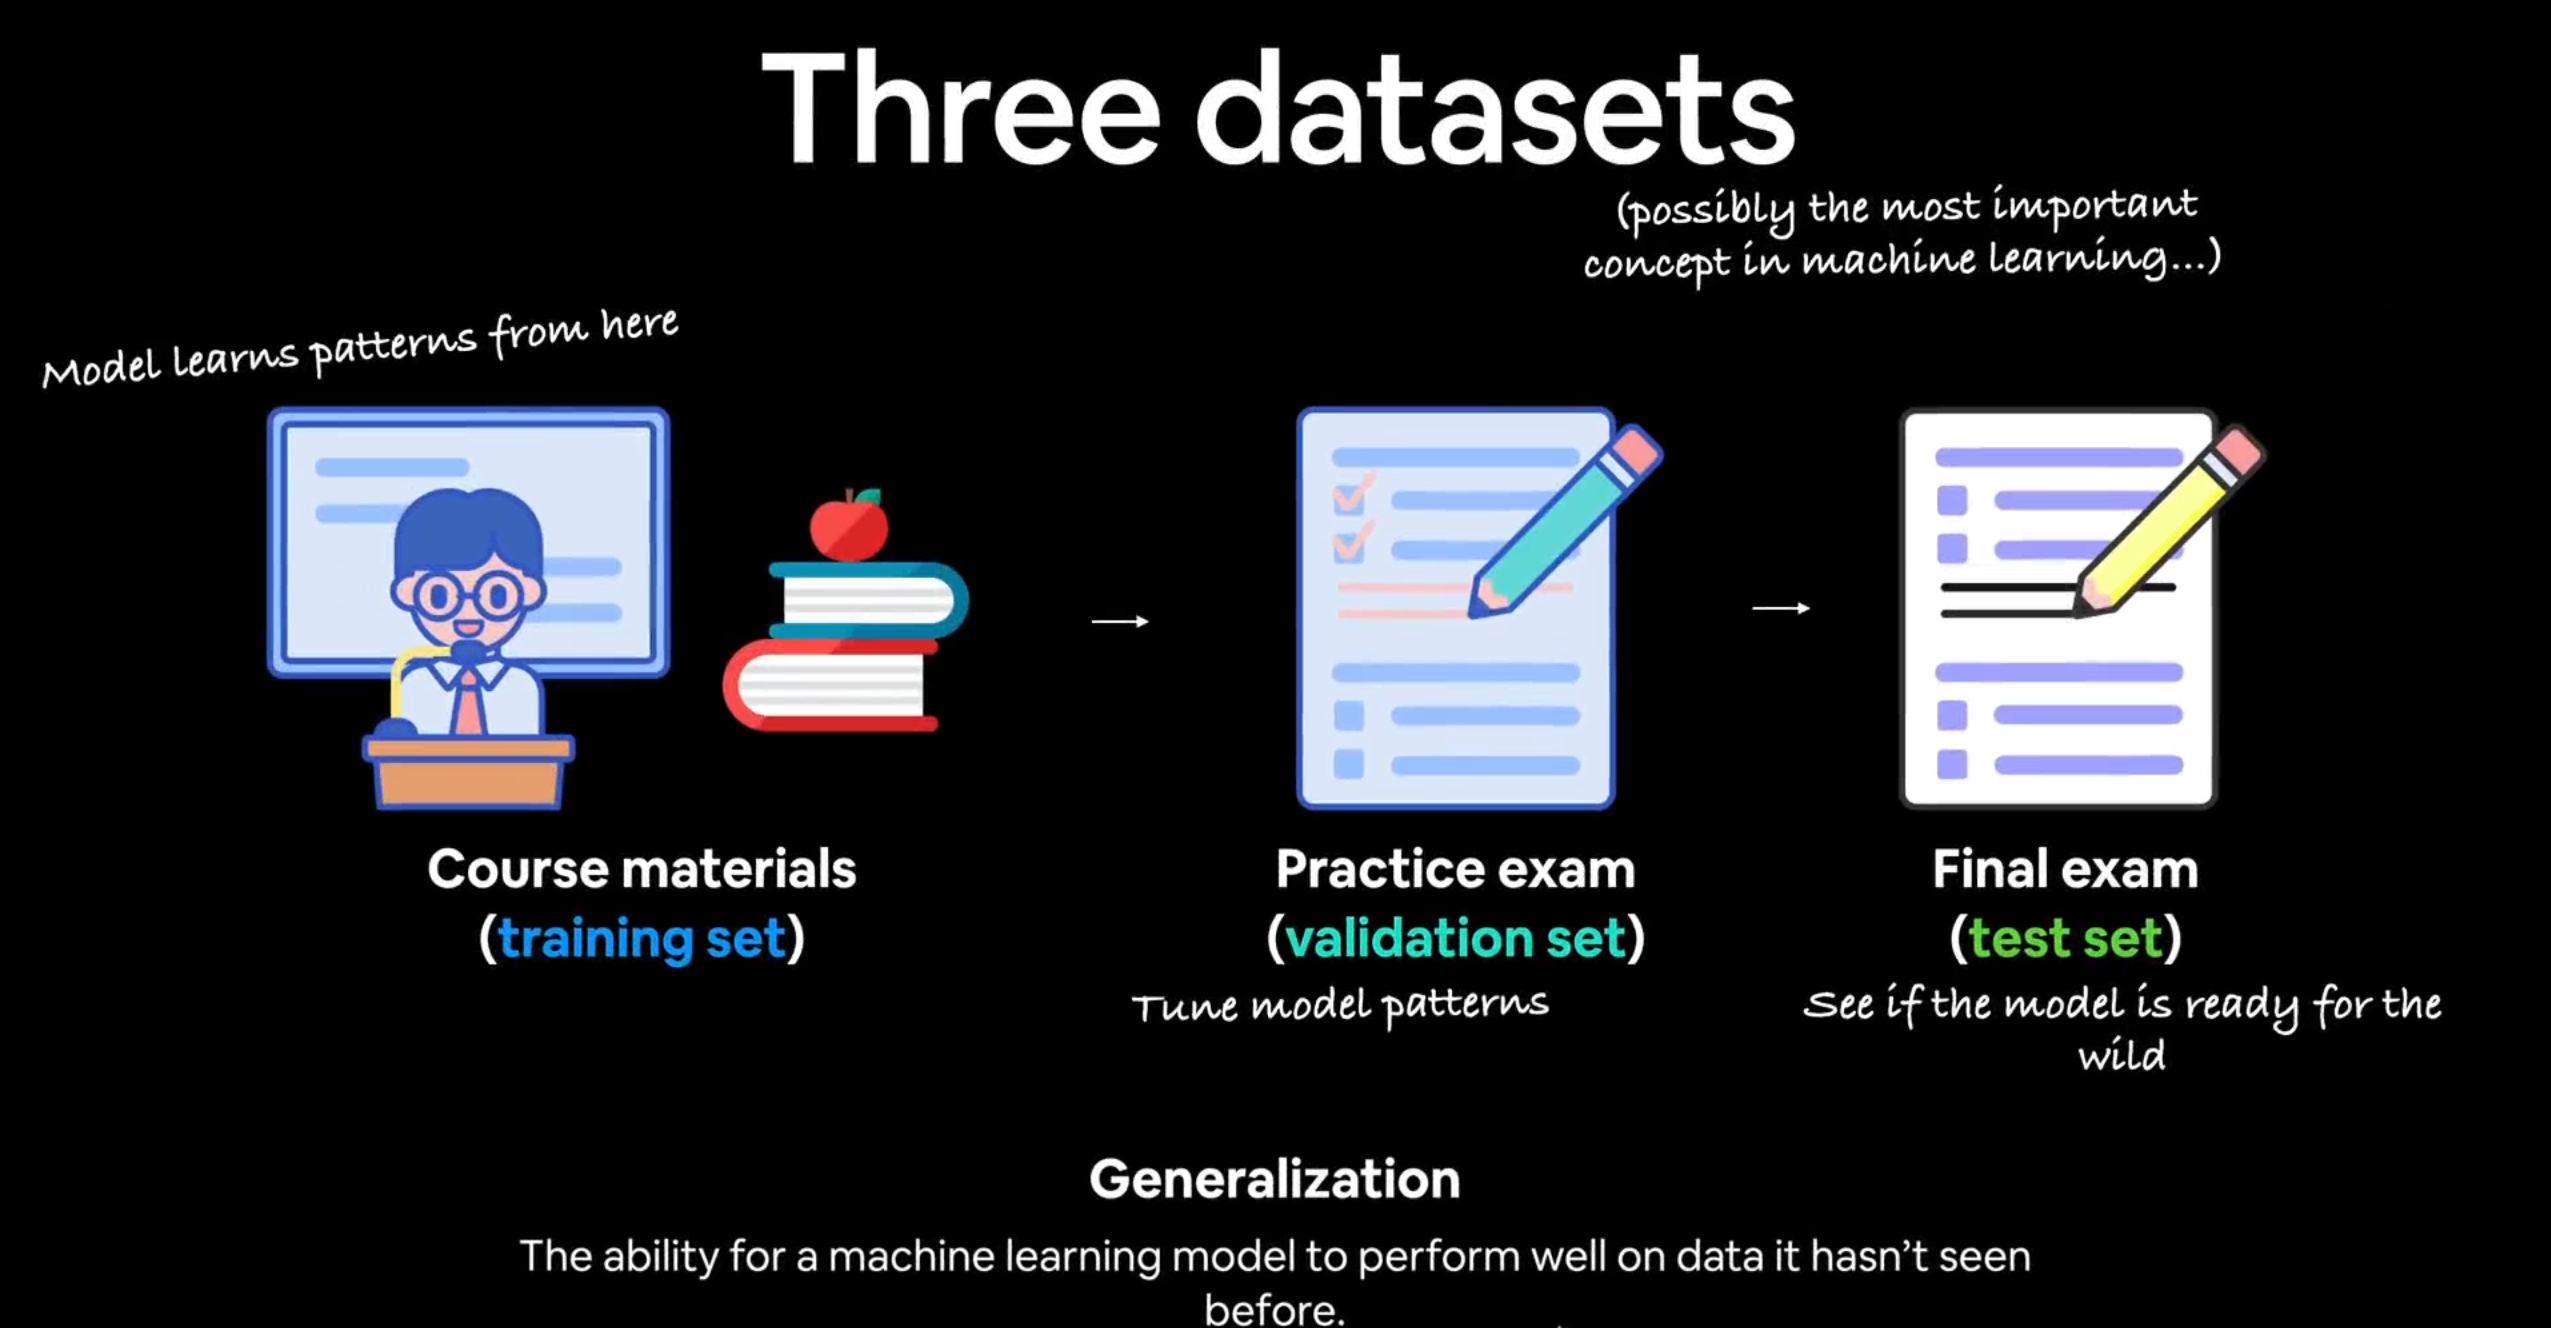

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
X = torch.linspace(1, 2, 30, device=device).unsqueeze(dim=1)
y = 0.29 * X + 0.28  # y = a*X + b

In [4]:
y[:10]

tensor([[0.5700],
        [0.5800],
        [0.5900],
        [0.6000],
        [0.6100],
        [0.6200],
        [0.6300],
        [0.6400],
        [0.6500],
        [0.6600]], device='cuda:0')

### Split the data into train and test

In [5]:
split = int(0.7 * len(X))  # 70 % of the Data
split

21

In [6]:
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

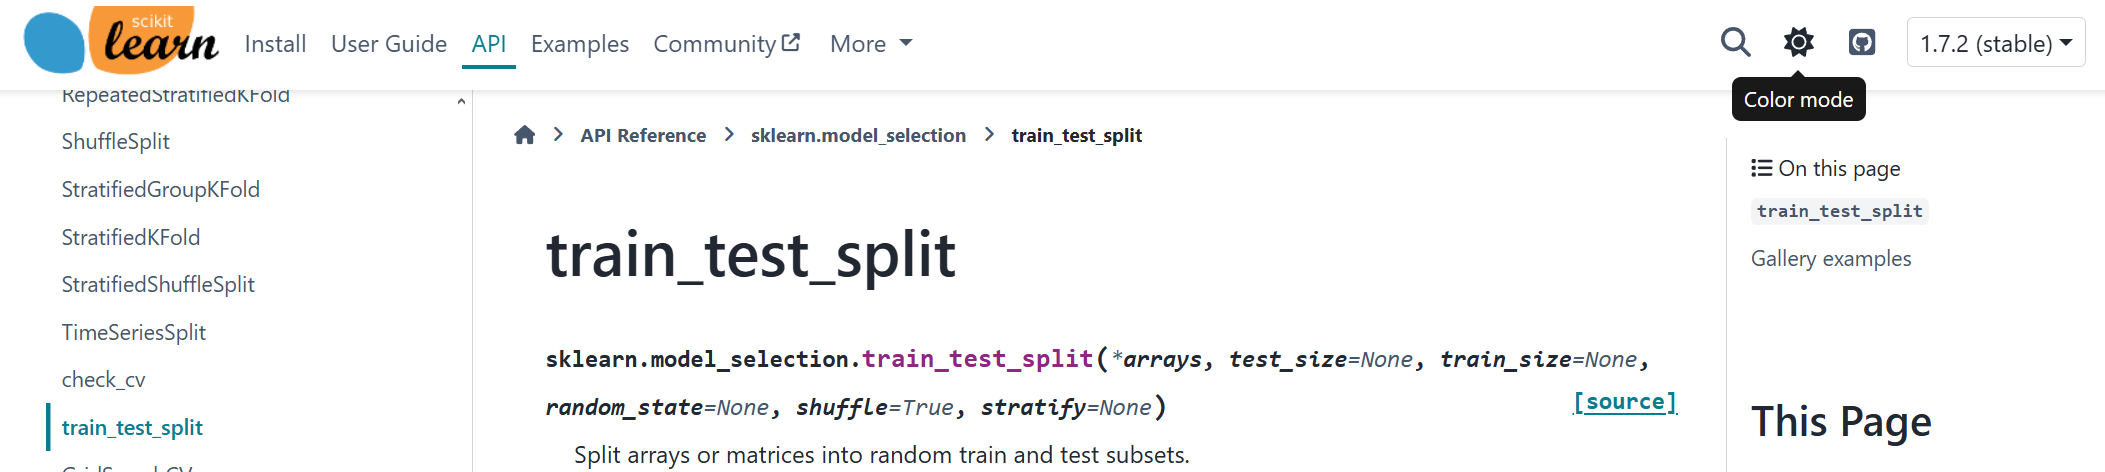

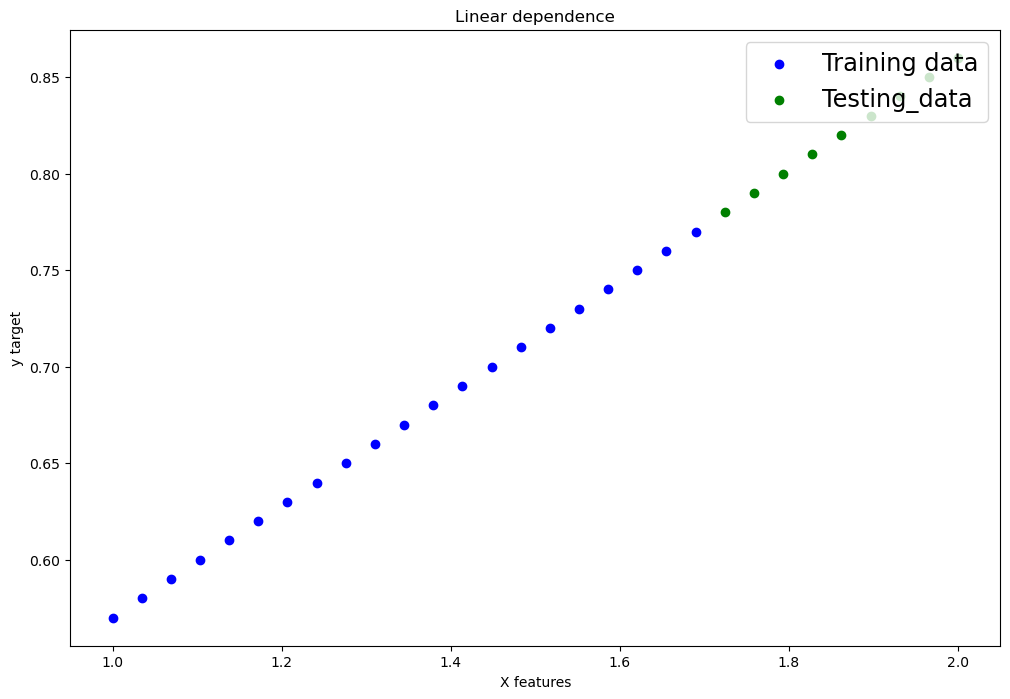

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(X_train.cpu(), y_train.cpu(), c='b', label='Training data')
plt.scatter(X_test.cpu(), y_test.cpu(), c='g', label='Testing_data')
plt.xlabel('X features')
plt.ylabel('y target')
plt.title('Linear dependence')
plt.legend(loc=1, fontsize='xx-large')
plt.show()

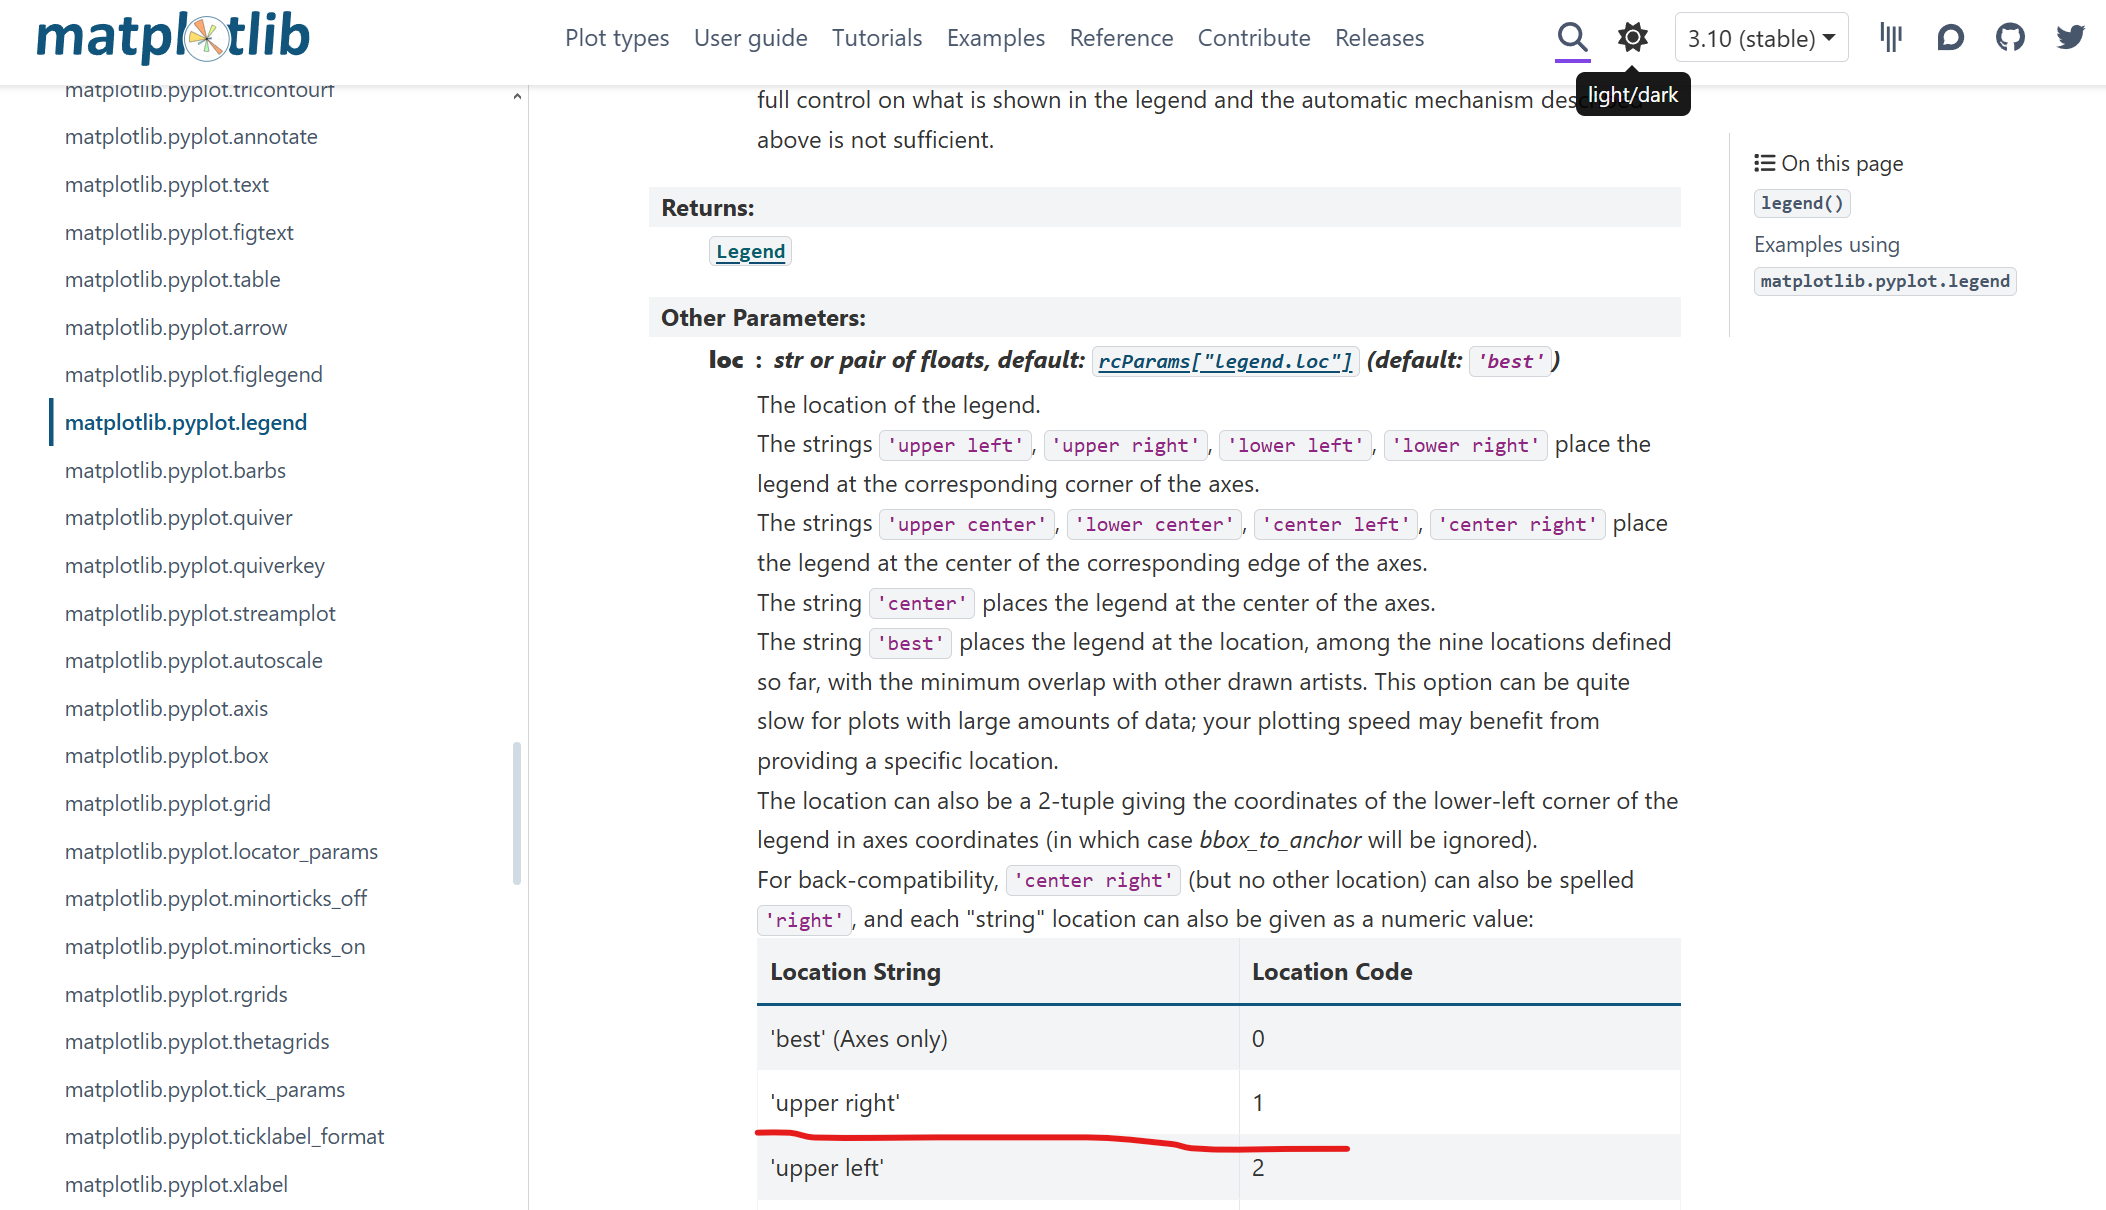

In [8]:
class SimpleLinReg(nn.Module):
    def __init__(self):
        super().__init__()
        # .randn(size=1) means tensor with 1 element
        self.weights = nn.Parameter(data=torch.randn(1, requires_grad=True, dtype=torch.float16))
        self.bias = nn.Parameter(data=torch.randn(1, requires_grad=True, dtype=torch.float16))

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        """Define the computation in the model."""
        return self.weights * X + self.bias

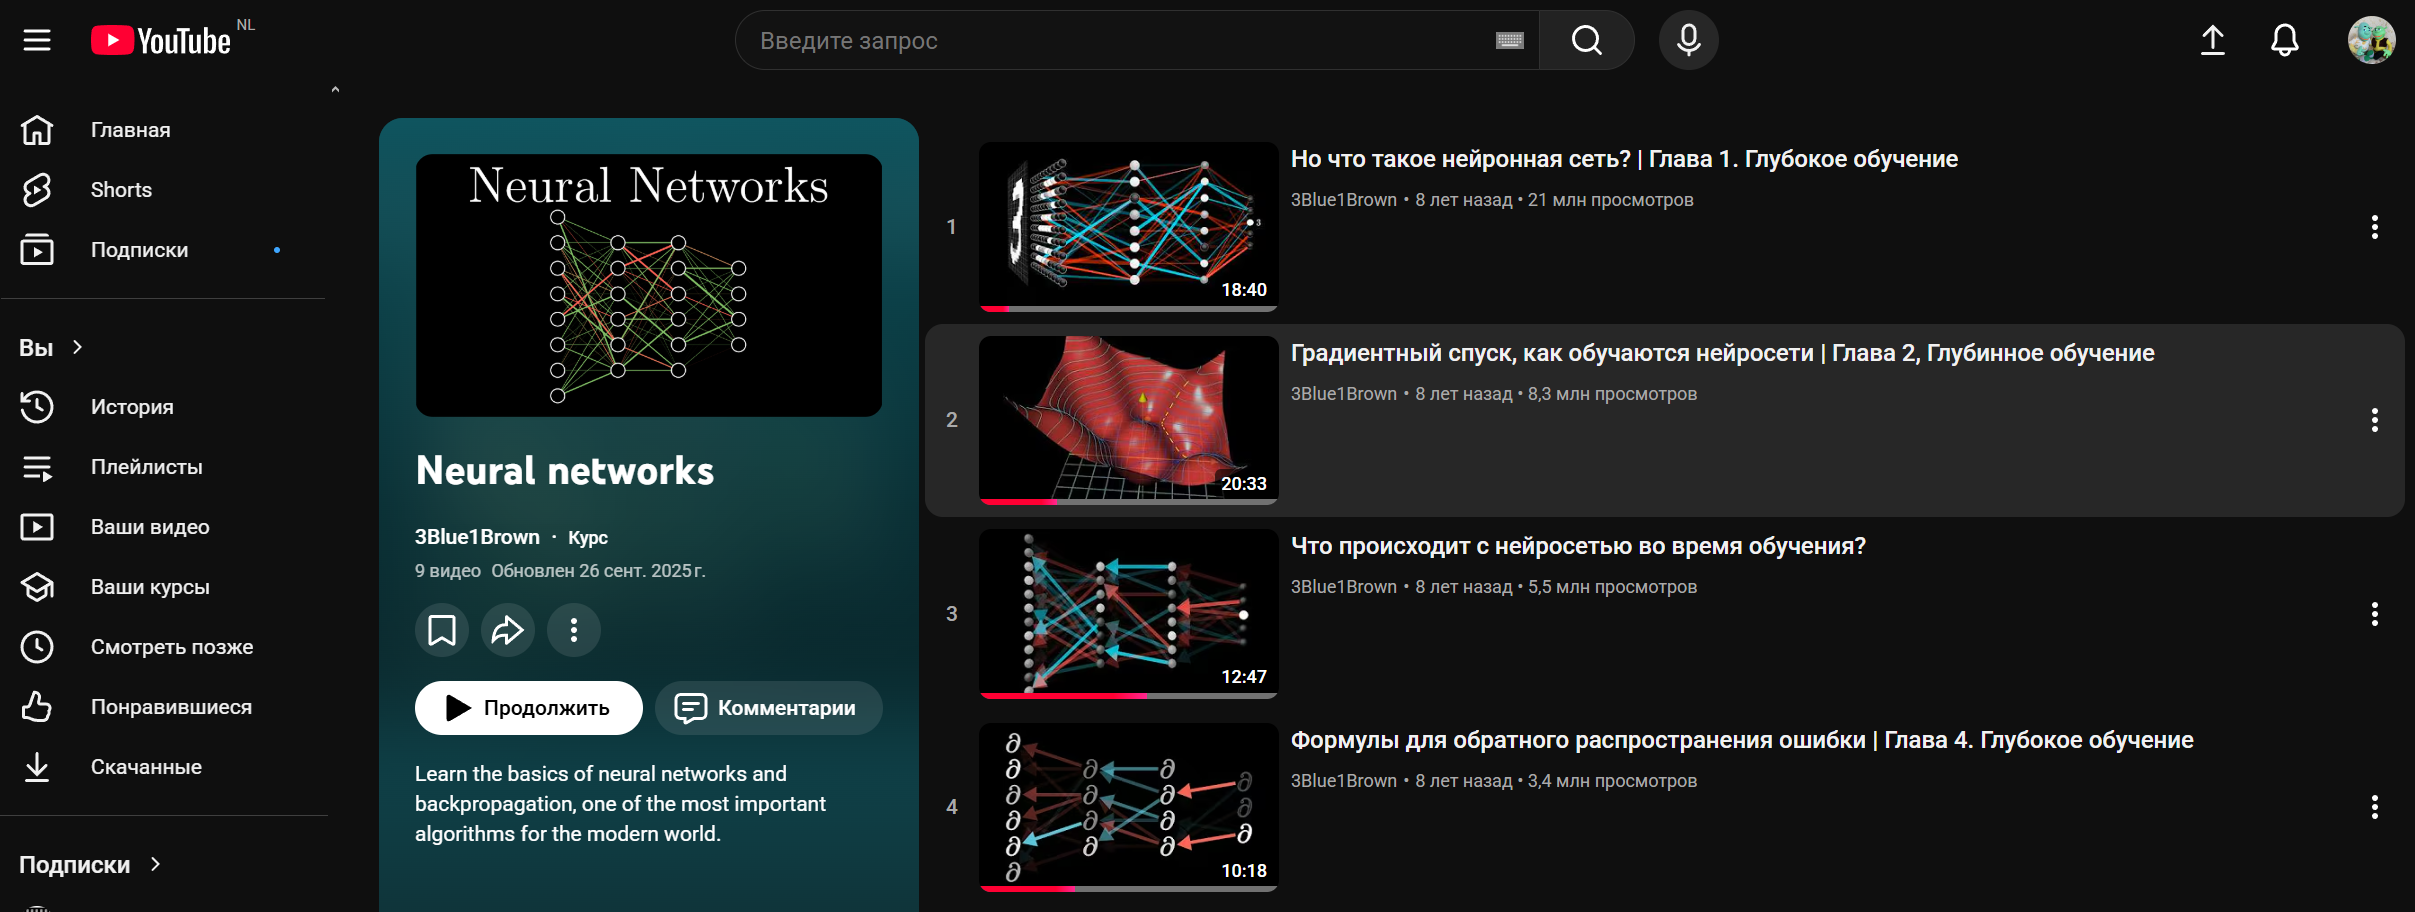

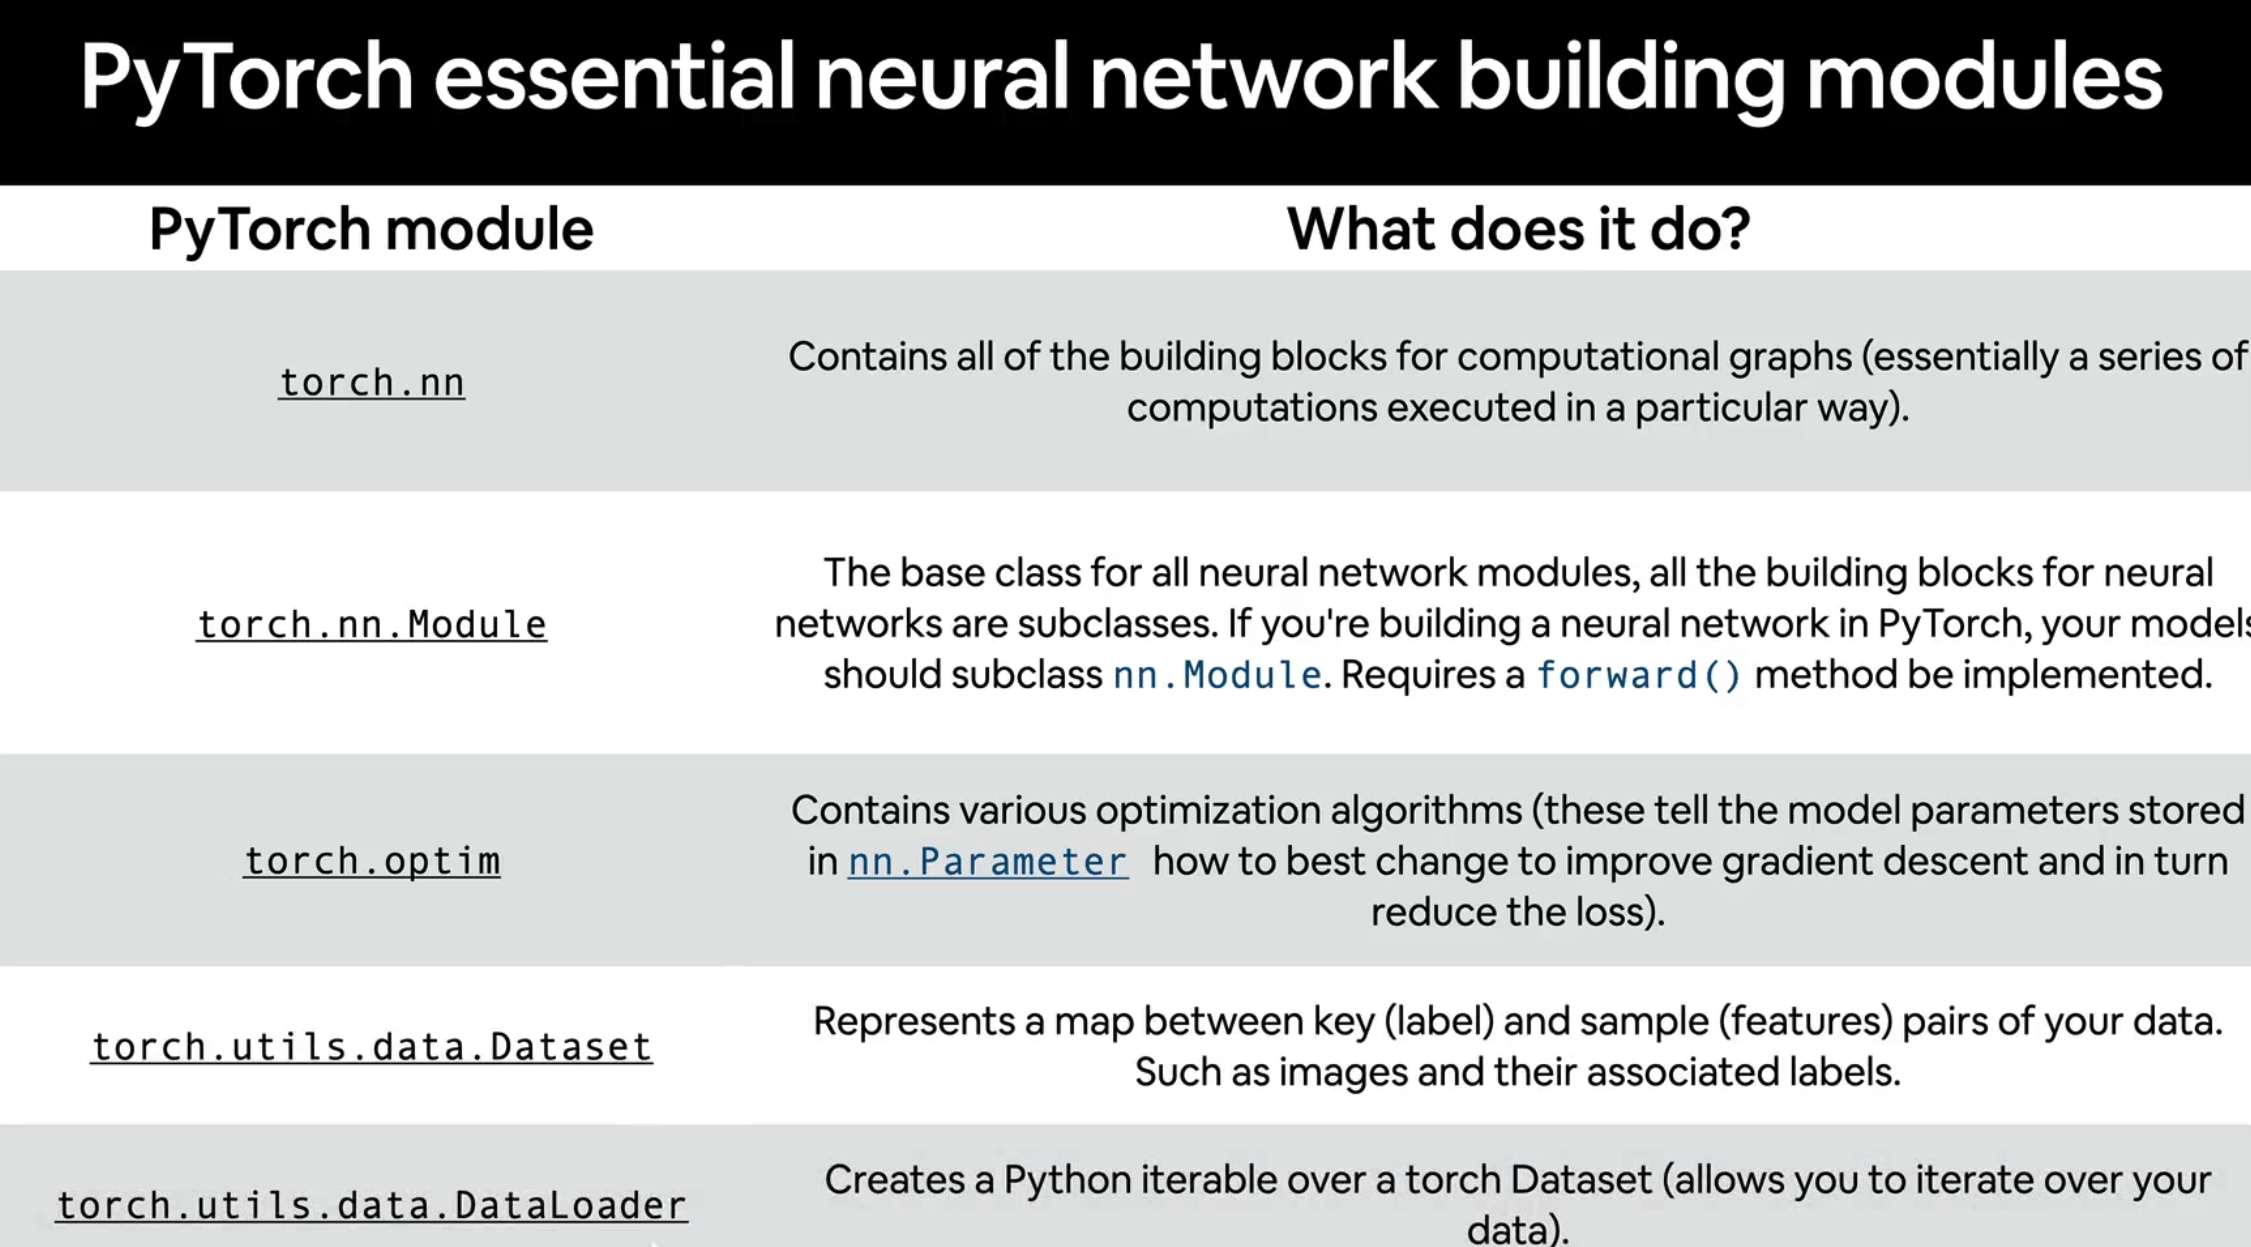

In [9]:
torch.manual_seed(29)

sim_lin_reg = SimpleLinReg()
list(sim_lin_reg.parameters())

[Parameter containing:
 tensor([1.1475], dtype=torch.float16, requires_grad=True),
 Parameter containing:
 tensor([-0.1417], dtype=torch.float16, requires_grad=True)]

### Most ML models start training with random parameters

`torch.nn.Module.state_dict()`

`y = 0.29 * X + 0.28`

In [10]:
sim_lin_reg.state_dict()

OrderedDict([('weights', tensor([1.1475], dtype=torch.float16)),
             ('bias', tensor([-0.1417], dtype=torch.float16))])

In [11]:
# Check .forward() method
input_0 = torch.tensor([0.7, 0.3])
sim_lin_reg.forward(X=input_0)

tensor([0.6615, 0.2025], grad_fn=<AddBackward0>)

In [12]:
with torch.inference_mode():
    y_preds = sim_lin_reg.to(device=device).forward(X=X_test)

y_preds

tensor([[1.8367],
        [1.8762],
        [1.9158],
        [1.9554],
        [1.9949],
        [2.0345],
        [2.0741],
        [2.1136],
        [2.1532]], device='cuda:0')

In [13]:
def plot_predictions(pred: torch.Tensor, test: torch.Tensor):
    # Conver from cuda device to cpu
    pred = pred.cpu()
    test = test.to(device="cpu")
    
    plt.plot(test, "*b", label="predicted data")
    plt.plot(pred, "*r", label="test data")

    plt.grid()
    plt.legend(loc="upper left")
    plt.show()

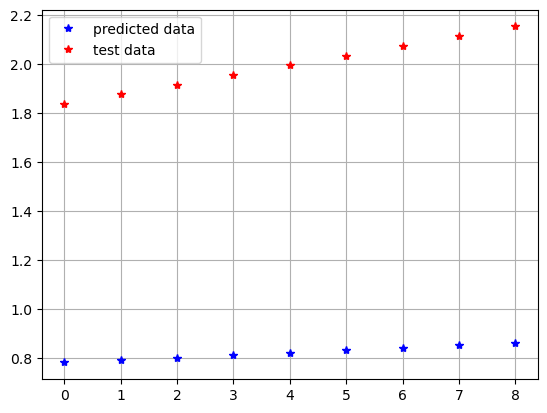

In [14]:
plot_predictions(y_preds, y_test)

In [15]:
torch.equal(y_preds, y_test)

False

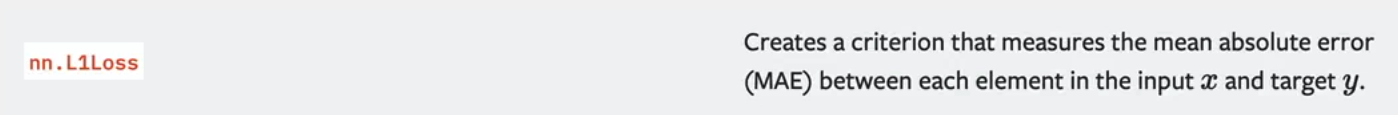

#### Loss function and optimizer

In [17]:
loss_fn = nn.L1Loss()  # MAE loss function
loss_fn

L1Loss()

In [24]:
from torch import optim

optimizer = optim.SGD(params=sim_lin_reg.parameters(), lr=1e-2)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Training loop

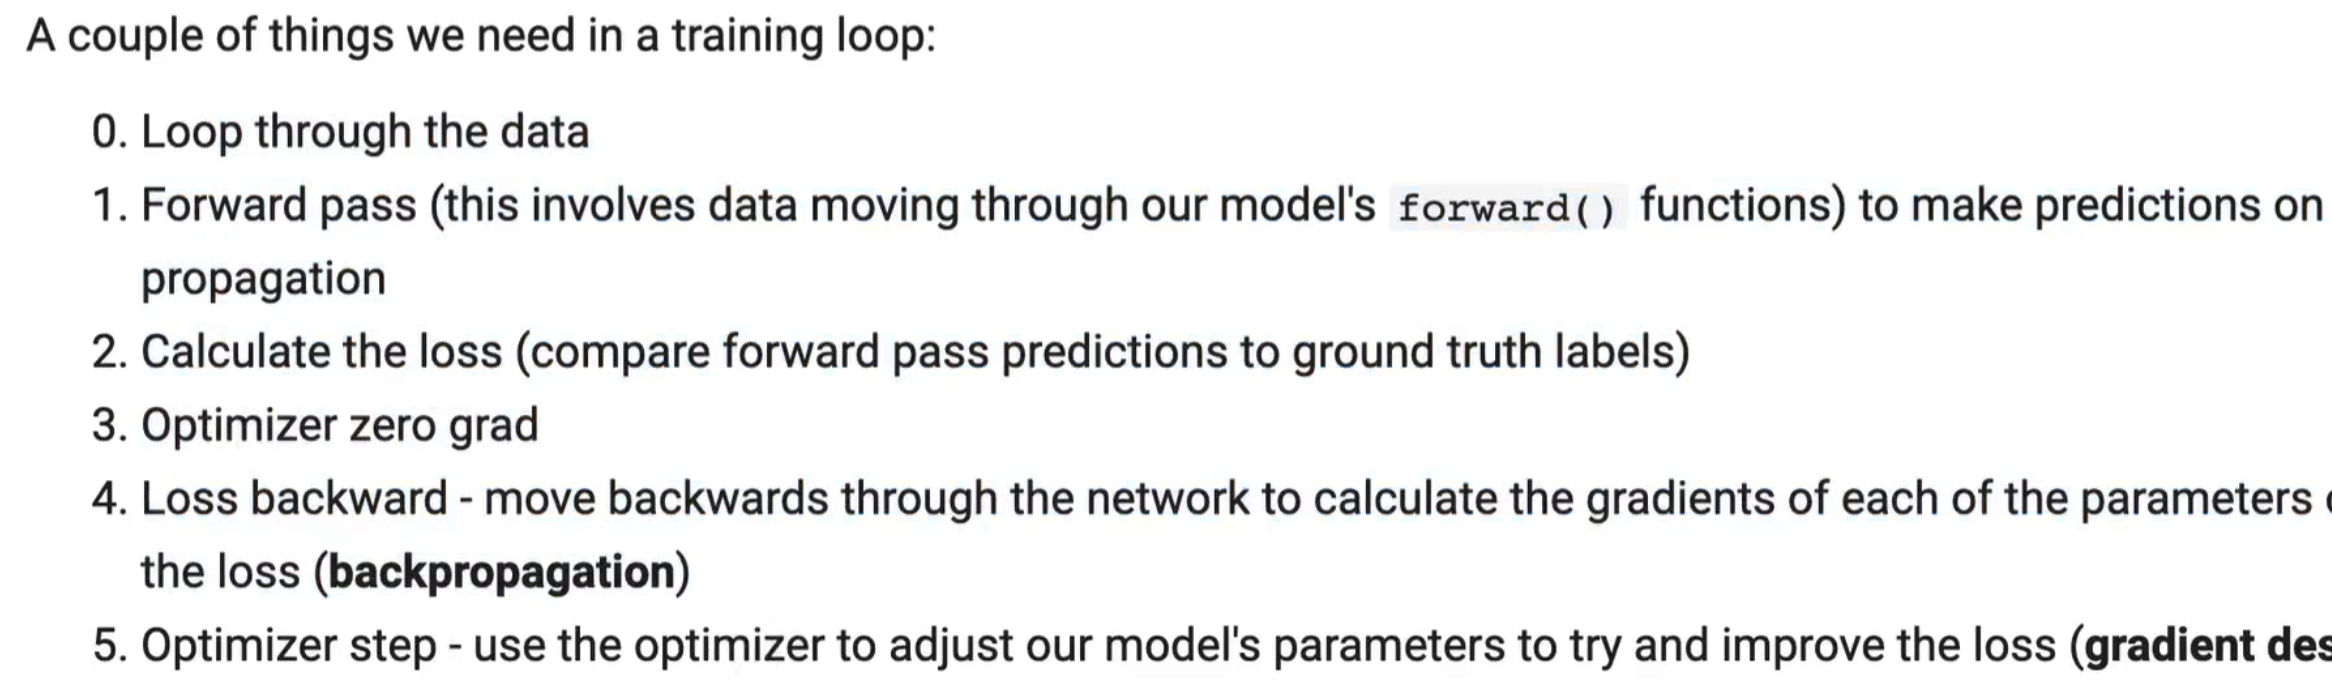

In [ ]:
epochs = 2

for epochs in range(epochs):
    # Training mode (set parameters to require gradients)
    sim_lin_reg.train()

    # TODO continue training loop